## Scraping a single page

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

First, I used selenium to extract all the links from the webpage using the Safari web driver

In [28]:
# Configure the Safari web driver
driver = webdriver.Safari()

# Navigate to the search results page
url = 'https://gov.texas.gov/news/archive'
driver.get(url)

# Wait for the page to finish loading
wait = WebDriverWait(driver, 20)

# Extract the links from the page
soup = BeautifulSoup(driver.page_source, 'html.parser')
response = soup.find(class_="l-content columns small-12 medium-7 large-8")
links = response.find_all('a')

# for link in links[1:10]:
#     print(link)
#     print()
    
driver.quit()    

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-tea-release-teacher-vacancy-recommendations">Governor Abbott, TEA Release Teacher Vacancy Recommendations</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-txdot-announce-record-100-billion-10-year-transportation-plan">Governor Abbott, TxDOT Announce Record $100 Billion 10-Year Transportation Plan</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-announces-film-friendly-texas-designation-for-the-city-of-cameron">Governor Abbott Announces Film Friendly Texas Designation For The City Of Cameron</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-launches-statewide-street-takeover-task-force">Governor Abbott Launches Statewide Street Takeover Task Force</a>

<a class="readMore" href="https://gov.texas.gov/news/post/governor-abbott-outlines-priorities-for-texas-thriving-economy">Governor Abbott Outlines Priorities For Texas’ Thriving

This is a function that will be used later to combine all the text on each webpage into a single string

In [3]:
def get_text(text_list):
    arr = []
    for t in text_list:
        arr.append(t.get_text())
    return " ".join(arr)

Here I parsed through each link to its respective webpage, then extracting all the text and saving it into a map depening on if it contained the term "Operation Lone Star"

In [45]:
driver = webdriver.Safari()

ols_map = {}
no_ols = {}
for link in links:
    href = link.get('href')
    if href.startswith('http'):
        # Navigate to the page
        driver.get(href)

        # Extract the relevant text
        page_soup = BeautifulSoup(driver.page_source, 'html.parser')
        texts = page_soup.find_all('p')
        text = get_text(texts).lower()
        
        # Store the text in a map
        if "operation lone star" in text:
            ols_map[link.get_text().lower()] = text
        else:
            no_ols[link.get_text().lower()] = text

driver.quit()

In [47]:
# results_map[links[0].get_text()]
print(len(no_ols))

62


In [48]:
print(results_map["Governor Abbott, TEA Release Teacher Vacancy Recommendations"])

February 24, 2023 | Austin, Texas 
      |
        
          Press Release
 Governor Greg Abbott today announced the release of the Final Report of the Teacher Vacancy Task Force that focuses on three primary areas of policy recommendations to address school district staffing challenges in Texas. In March 2022, Governor Abbott directed Texas Education Agency (TEA) Commissioner Mike Morath to immediately create a task force to help school districts address ongoing staffing retention and recruitment challenges. "Educating Texas students is crucial for the continued success of our great state, and teachers play a pivotal role in that success," said Governor Abbott. "I thank the teachers and school leaders on this task force for their work addressing full-time and substitute teacher vacancies in Texas schools. Their recommendations will help ensure that best practices and resources are available for teacher recruitment and retention. Working with the Texas legislature, we will develop and

## Scraping news for multiple dates

Let's try the same thing, but now to iterate through the archive page for each, retrieving all the links, then iterating through each link to get all the articles. The articles are then saved in a multi-layer map, similar in format to a json file, separated by month and year. I also exported all the data, separated by month, into a json file in the archive folder to avoid having to parse through all the pages again.

2021-present

In [107]:
import json

years = ['2022', '2023'] #'2021',
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']
driver = webdriver.Safari()

results_map = {}
no_results_map = {}
for year in years:
    if year == '2023':
        y_months = months[0:2]
    else:
        y_months = months
        
    year_map = {}
    no_year_map = {}
    for month in y_months:
        month_map = {}
        no_month_map = {}
        
        url = f'https://gov.texas.gov/news/archive/{year}/{month}'
        driver.get(url)
        print(url)
        
        # Wait for the page to finish loading
        wait = WebDriverWait(driver, 100)
        
        # Extract the links from the page
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        # print(soup.prettify())
        nsoup = soup.find(class_="l-siteContent")
        response = nsoup.find(class_="l-content columns small-12 medium-7 large-8")
        links = response.find_all('a')

        for link in links:
            href = link.get('href')
            if href.startswith('http'):
                # Navigate to the page
                driver.get(href)

                # Extract the relevant text
                page_soup = BeautifulSoup(driver.page_source, 'html.parser')
                texts = page_soup.find_all('p')
                text = get_text(texts).lower()

                # Store the text in a map
                if "operation lone star" in text:
                    month_map[link.get_text().lower()] = text
                else:
                    no_month_map[link.get_text().lower()] = text
        
        with open(f"archive/OLS/{year}/{month}.json", "w") as outfile:
            # write the dictionary to the file as JSON
            json.dump(month_map, outfile)
        
        with open(f"archive/noOLS/{year}/{month}.json", "w") as outfile:
            # write the dictionary to the file as JSON
            json.dump(no_month_map, outfile)
            
        year_map[month] = month_map
        no_year_map[month] = no_month_map
    
    results_map[year] = year_map
    no_results_map[year] = no_year_map
            
driver.quit()    

https://gov.texas.gov/news/archive/2022/01
https://gov.texas.gov/news/archive/2022/02
https://gov.texas.gov/news/archive/2022/03
https://gov.texas.gov/news/archive/2022/04
https://gov.texas.gov/news/archive/2022/05
https://gov.texas.gov/news/archive/2022/06
https://gov.texas.gov/news/archive/2022/07
https://gov.texas.gov/news/archive/2022/08
https://gov.texas.gov/news/archive/2022/09
https://gov.texas.gov/news/archive/2022/10
https://gov.texas.gov/news/archive/2022/11
https://gov.texas.gov/news/archive/2022/12
https://gov.texas.gov/news/archive/2023/01
https://gov.texas.gov/news/archive/2023/02


counting the total articles read:

In [135]:
total = 0
for year in results_map:
    for month in results_map[year]:
        total = total + len(results_map[year][month])
print(total, "total articles containing \"Operation Lone Star\"")

total = 0
for year in no_results_map:
    for month in no_results_map[year]:
        total = total + len(no_results_map[year][month])
print(total, "total articles not containing \"Operation Lone Star\"")


93 total articles containing "Operation Lone Star"
1549 total articles not containing "Operation Lone Star"


To read json files in archive:

In [253]:
years = ['2021', '2022', '2023']
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']

results_map2 = {}
no_results_map2 = {}
for year in years:
    year_map2 = {}
    no_year_map2 = {}
    
    if year == '2023':
        months = months[0:2]
    for month in months:
        f = open(f'archive/OLS/{year}/{month}.json')
        data = json.load(f)
        year_map2[month] = data
        
        f = open(f'archive/noOLS/{year}/{month}.json')
        data = json.load(f)
        no_year_map2[month] = data
        
    results_map2[year] = year_map2
    no_results_map2[year] = no_year_map2
    


now lets scrape the DPS website

In [22]:
import json

years = ['2021', '2022', '2023']
driver = webdriver.Safari()

dps_results_map = {}
dps_no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    links = []
    count = -1
    page = 0
    
    # Extract the links from the page
    while count != 0:
        url = f'https://www.dps.texas.gov/news/press-releases?year={year}&field_press_release_type_value=All&page={page}'
        driver.get(url)
        wait = WebDriverWait(driver, 100)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        nsoup = soup.find(class_="views-element-container settings-tray-editable block block-views block-views-blockrecent-press-releases-block-1")
        response = nsoup.find(class_="item-list")
        if response != None:
            links.append(response.find_all('a'))
            count = len(response.find_all('a'))
        else:
            count = 0
        page = page + 1

    for ls in links:
        for link in ls:
            href = link.get('href')
            if href.startswith('/news'):
                # Navigate to the page
                url = f'https://www.dps.texas.gov{href}'
                driver.get(url)

                # Extract the relevant text
                page_soup = BeautifulSoup(driver.page_source, 'html.parser')
                texts = page_soup.find_all('p')
                text = get_text(texts).lower()

                # Store the text in a map
                if "operation lone star" in text:
                    # print(text[0:20])
                    year_map[link.get_text().lower()] = text
                else:
                    # print("none")
                    no_year_map[link.get_text().lower()] = text

    with open(f"archive/DPS/OLS/{year}.json", "w") as outfile:
        # write the dictionary to the file as JSON
        json.dump(year_map, outfile)

    with open(f"archive/DPS/noOLS/{year}.json", "w") as outfile:
        # write the dictionary to the file as JSON
        json.dump(no_year_map, outfile)
    
    dps_results_map[year] = year_map
    dps_no_results_map[year] = no_year_map
            
driver.quit()    

Now lets look at how many articles we obtained

In [23]:
total = 0
for year in dps_results_map:
    total = total + len(dps_results_map[year])
print(total, "total articles containing \"Operation Lone Star\"")

total = 0
for year in dps_no_results_map:
    total = total + len(dps_no_results_map[year])
print(total, "total articles not containing \"Operation Lone Star\"")

37 total articles containing "Operation Lone Star"
220 total articles not containing "Operation Lone Star"


Here is the code for reading the article information from the JSON files, so we can avoid using the web driver every time

In [ ]:
years = ['2021', '2022', '2023']

dps_results_map = {}
dps_no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    
    f = open(f'archive/DPS/OLS/{year}.json')
    data = json.load(f)
    year_map[year] = data

    f = open(f'archive/DPS/noOLS/{year}.json')
    data = json.load(f)
    no_year_map[month] = data
        
    dps_results_map[year] = year_map
    dps_no_results_map[year] = no_year_map
    

## Word Frequency

As a beginning of the analysis, lets just calculate word frequencies for each month, year, and overall

In [133]:
import nltk
from nltk import FreqDist

lets work at word frequency per month

First I converted the map data into a numpy array for ease of handling later on

In [228]:
import numpy as np

years = ['2021', '2022', '2023']
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']

all_results_dict = {}
for year in years:
    if year == '2023':
            months = ['01', '02']
    for month in months:
        # print(results_map[year][month])
        text_month = " ".join(results_map[year][month].values())
        all_results_dict[f'{month}/{year}'] = text_month
        
# print(len(all_results_dict))
# print(all_results_dict.items())

dtype = np.dtype([
    ('id', int),
    ('date', object),
    ('text', object),
])

data_list = [(i, k, "".join(list(v))) for i, (k, v) in enumerate(all_results_dict.items())]

all_results_np = np.array(data_list, dtype=dtype)

print(all_results_np[4])

(4, '05/2021', 'may 27, 2021 | austin, texas \n      |\n        \n          press release\n governor greg abbott today held a press conference in fort worth where he highlighted the state\'s efforts to secure the border and stop the trafficking of fentanyl into texas. in response to an unprecedented surge in fentanyl coming across the border, the governor announced his intention to sign senate bill 768 (huffman/johnson) that will create a specific criminal offense, beginning with a third degree felony, for the manufacturing or delivery of fentanyl. the governor pointed to president biden\'s open border policies as a cause behind the surge in fentanyl, and urged the president\xa0to address this crisis and secure the border. governor abbott called upon parents to educate their children about the potentially deadly consequences of taking fentanyl, or unknowingly taking other drugs laced with fentanyl.\xa0 "lives are at stake as dangerous drugs like fentanyl pour into our communities at an

In [232]:
all_results_np['date']

array(['01/2021', '02/2021', '03/2021', '04/2021', '05/2021', '06/2021',
       '07/2021', '08/2021', '09/2021', '10/2021', '11/2021', '12/2021',
       '01/2022', '02/2022', '03/2022', '04/2022', '05/2022', '06/2022',
       '07/2022', '08/2022', '09/2022', '10/2022', '11/2022', '12/2022',
       '01/2023', '02/2023'], dtype=object)

Calculate word frequencies per each month. Note that the first 2 months are empty as this was before Operation Lone Star was announced. In general the words "border", "texas", and "governor, which makes a lot of sense. Maybe in the future, I could create a line graph to show the changes of the top words for each month.

In [246]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

freqs = {}

for _,d,t in all_results_np:
    words = tokenizer.tokenize(t)
    filtered_tokens = [token for token in words if token not in stop_words]
    fdist = FreqDist(filtered_tokens)
    freqs[d] = fdist
    
for k, v in freqs.items():
    print(k, ':')
    for word, frequency in v.most_common(10):
        print(f"{word}: {frequency}")
    print()
        
        

01/2021 :

02/2021 :

03/2021 :
border: 45
texas: 32
governor: 30
administration: 20
biden: 18
abbott: 17
human: 16
trafficking: 16
crisis: 12
march: 10

04/2021 :
border: 17
governor: 14
texas: 11
biden: 7
crisis: 7
abbott: 6
president: 6
operation: 6
press: 5
letter: 5

05/2021 :
fentanyl: 14
governor: 8
border: 8
county: 7
texas: 6
2021: 5
president: 5
abbott: 4
tarrant: 4
press: 3

06/2021 :
border: 8
texas: 4
vice: 3
president: 3
austin: 2
czar: 2
harris: 2
southern: 2
overrun: 2
open: 2

07/2021 :

08/2021 :
border: 44
texas: 27
county: 18
governor: 18
sheriffs: 13
funding: 12
secure: 11
since: 10
2021: 9
state: 9

09/2021 :
border: 55
texas: 51
governor: 41
state: 29
federal: 21
abbott: 20
secure: 19
funding: 16
local: 14
security: 13

10/2021 :
border: 35
governor: 32
texas: 29
abbott: 18
county: 13
general: 9
secure: 9
adjutant: 8
operation: 8
crisis: 8

11/2021 :
texas: 12
mexican: 9
governor: 7
service: 6
border: 6
members: 5
austin: 4
president: 4
government: 4
november: 3


Now lets calculate the word frequencies for the each year (2021, 2022, and 2023). Its probably better to split them up more easily, but this is what I settled in for now.

In [283]:
year_freqs = {}

temp = []
for _,d,t in all_results_np:
    temp.append(t)
    
year_text = [" ".join(temp[0:12]), " ".join(temp[12:24]), " ".join(temp[24:])]


for i, t in enumerate(year_text):
    words = tokenizer.tokenize(t)
    filtered_tokens = [token for token in words if token not in stop_words]
    fdist = FreqDist(filtered_tokens)
    year_freqs[years[i]] = fdist
    
for k, v in year_freqs.items():
    print(k, ':')
    for word, frequency in v.most_common(10):
        print(f"{word}: {frequency}")
    print()
        
        

2021 :
border: 229
texas: 181
governor: 162
abbott: 85
secure: 57
state: 53
biden: 50
operation: 49
crisis: 48
austin: 47

2022 :
border: 990
texas: 979
dps: 599
illegal: 514
governor: 464
abbott: 365
immigrants: 340
national: 316
guard: 285
operation: 272

2023 :
border: 189
texas: 131
illegal: 111
dps: 103
governor: 76
immigrants: 70
biden: 68
abbott: 61
president: 54
watch: 45



Heres a cool graph for visualizing the most common words using seaborn and matplotlib

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

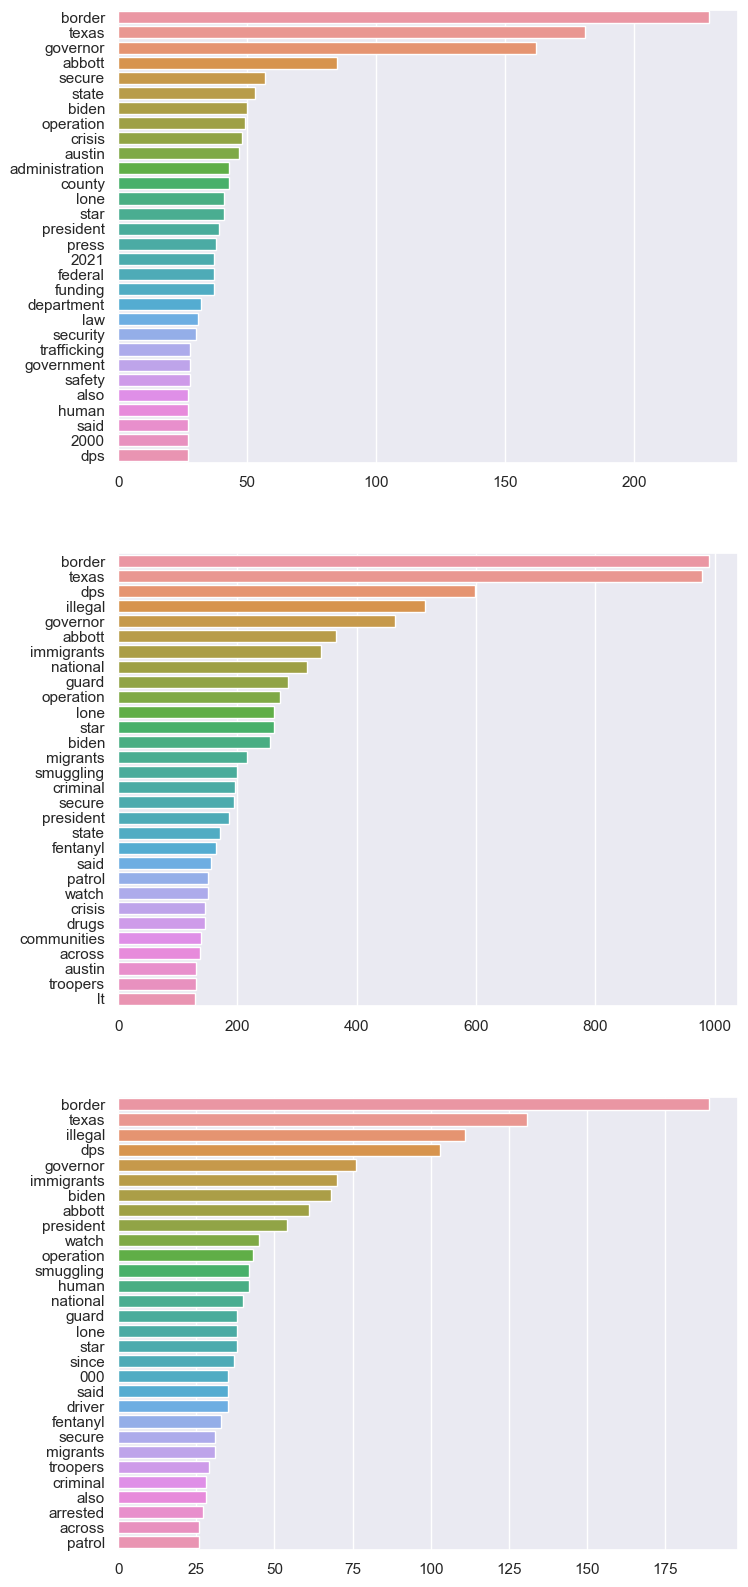

In [301]:
top_words_2021 = year_freqs['2021'].most_common(30)
top_words_2022 = year_freqs['2022'].most_common(30)
top_words_2023 = year_freqs['2023'].most_common(30)


# Create a bar plot of the most common words
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.set(style="darkgrid")
sns.barplot(ax = axes[0], 
            x=[w[1] for w in top_words_2021], 
            y=[w[0] for w in top_words_2021])

sns.barplot(ax = axes[1], 
            x=[w[1] for w in top_words_2022], 
            y=[w[0] for w in top_words_2022])

sns.barplot(ax = axes[2], 
            x=[w[1] for w in top_words_2023], 
            y=[w[0] for w in top_words_2023])

Lets do this one last time to show the overall frequencies of the words over all the articles.

In [267]:

all_text = " ".join(all_results_np['text'])
                    
words = tokenizer.tokenize(all_text)
filtered_tokens = [token for token in words if token not in stop_words]
fdist = FreqDist(filtered_tokens)


for word, frequency in fdist.most_common(10):
    print(f"{word}: {frequency}")
        

border: 1408
texas: 1291
dps: 729
governor: 702
illegal: 643
abbott: 511
immigrants: 412
national: 383
biden: 373
operation: 364


<AxesSubplot: >

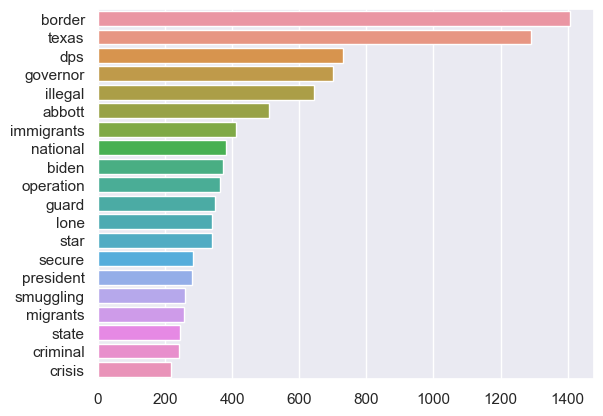

In [272]:
top_words = fdist.most_common(20)

# Create a bar plot of the most common words
sns.set(style="darkgrid")
sns.barplot(x=[w[1] for w in top_words], y=[w[0] for w in top_words])